In [1]:
import matplotlib.pyplot as plt
import numpy as np
import os
from scipy.interpolate import interp1d
%matplotlib inline

In [2]:
plt.rcParams['axes.grid'] = True

In [3]:
roots = [2.2691853142129728, 2.104982167992544, 1.932307699120554, 1.749339162933206, 1.5536238493280832, 1.34187327905057, 1.109960313758399, 0.8541630993606272, 0.5762735442012712, 0.2885386111960936, 0.03198372863548067]
jds = [0.0, -0.1, -0.2, -0.3, -0.4, -0.5, -0.6, -0.7, -0.8, -0.9, -1.0]
get_crit_T = dict(zip(jds, roots))
num_temps = 100

In [4]:
def errs(errs):
    return np.array([sum(errs[i*512:(i+1)*512])/512 for i in range(num_temps)])

def stds_err(errs):
    return np.array([np.std(errs[i*512:(i+1)*512]) for i in range(num_temps)])

In [5]:
pred_tc = {}

In [20]:
Jd = -0.3
T_c = get_crit_T[Jd]
T = np.linspace(T_c - 0.3, T_c + 0.3, num_temps)

opt_epochs = np.load('opt_epochs.npy', allow_pickle='TRUE').item()
epochs = opt_epochs[Jd]

L = 20
num_epochs = epochs[0]
with open(f'data_errors/{Jd}_{L}_{num_temps}_{num_epochs}_epochs_modified_tc.npy', 'rb') as f:
    errs_20 = np.load(f) 
with open(f'data_outputs/{Jd}_{L}_{num_temps}_{num_epochs}_epochs_modified_tc.npy', 'rb') as f:
    outs_20 = np.load(f) 
    
L = 30
num_epochs = epochs[1]
with open(f'data_errors/{Jd}_{L}_{num_temps}_{num_epochs}_epochs_modified_tc.npy', 'rb') as f:
    errs_30 = np.load(f)
with open(f'data_outputs/{Jd}_{L}_{num_temps}_{num_epochs}_epochs_modified_tc.npy', 'rb') as f:
    outs_30 = np.load(f)
    
L = 60
num_epochs = epochs[2]
with open(f'data_errors/{Jd}_{L}_{num_temps}_{num_epochs}_epochs_modified_tc.npy', 'rb') as f:
    errs_60 = np.load(f) 
with open(f'data_outputs/{Jd}_{L}_{num_temps}_{num_epochs}_epochs_modified_tc.npy', 'rb') as f:
    outs_60 = np.load(f) 

L = 80
num_epochs = epochs[3]
with open(f'data_errors/{Jd}_{L}_{num_temps}_{num_epochs}_epochs_modified_tc.npy', 'rb') as f:
    errs_80 = np.load(f) 
with open(f'data_outputs/{Jd}_{L}_{num_temps}_{num_epochs}_epochs_modified_tc.npy', 'rb') as f:
    outs_80 = np.load(f)

L = 120
num_epochs = epochs[4]
with open(f'data_errors/{Jd}_{L}_{num_temps}_{num_epochs}_epochs_modified_tc.npy', 'rb') as f:
    errs_120 = np.load(f) 
with open(f'data_outputs/{Jd}_{L}_{num_temps}_{num_epochs}_epochs_modified_tc.npy', 'rb') as f:
    outs_120 = np.load(f)
    
tcs_idxs = []
tcs_idxs.append(np.argmin(np.abs(0.5 - errs(outs_20))))
tcs_idxs.append(np.argmin(np.abs(0.5 - errs(outs_30))))
tcs_idxs.append(np.argmin(np.abs(0.5 - errs(outs_60))))
tcs_idxs.append(np.argmin(np.abs(0.5 - errs(outs_80))))
tcs_idxs.append(np.argmin(np.abs(0.5 - errs(outs_120))))
pred_tc[Jd] = np.mean([T[tcs_idxs[i]] for i in range(5)])

idx = dict(zip([20, 30, 60, 80, 120], tcs_idxs))

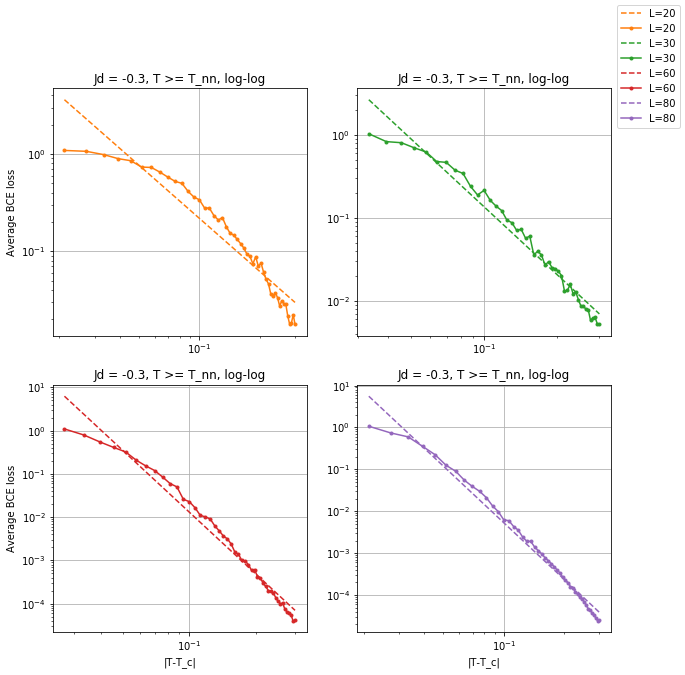

In [21]:
fig, ax = plt.subplots(2, 2, figsize=(10,10))

pf_20 = np.polyfit(np.log(np.abs(T-T_c)[idx[20]:]), np.log(errs(errs_20)[idx[20]:]), 1)
pf_30 = np.polyfit(np.log(np.abs(T-T_c)[idx[30]:]), np.log(errs(errs_30)[idx[30]:]), 1)
pf_60 = np.polyfit(np.log(np.abs(T-T_c)[idx[60]:]), np.log(errs(errs_60)[idx[60]:]), 1)
pf_80 = np.polyfit(np.log(np.abs(T-T_c)[idx[80]:]), np.log(errs(errs_80)[idx[80]:]), 1)
pf_120 = np.polyfit(np.log(np.abs(T-T_c)[idx[120]:]), np.log(errs(errs_120)[idx[120]:]), 1)

ax[0, 0].plot(np.abs(T-T_c)[idx[20]:], np.exp(np.poly1d(pf_20)(np.log(np.abs(T-T_c)))[idx[20]:]), '--', label='L=20', c='C1')
ax[0, 1].plot(np.abs(T-T_c)[idx[30]:], np.exp(np.poly1d(pf_30)(np.log(np.abs(T-T_c)))[idx[30]:]), '--', label='L=30', c='C2')
ax[1, 0].plot(np.abs(T-T_c)[idx[60]:], np.exp(np.poly1d(pf_60)(np.log(np.abs(T-T_c)))[idx[60]:]), '--', label='L=60', c='C3')
ax[1, 1].plot(np.abs(T-T_c)[idx[80]:], np.exp(np.poly1d(pf_80)(np.log(np.abs(T-T_c)))[idx[80]:]), '--', label='L=80', c='C4')
#ax[2, 1].plot(np.abs(T-T_c)[idx[120]:], np.exp(np.poly1d(pf_120)(np.log(np.abs(T-T_c)))[idx[120]:]), '--', label='L=120', c='C5')

ax[0, 0].plot(np.abs(T-T_c)[idx[20]:], errs(errs_20)[idx[20]:], marker='.', label='L=20', c='C1')
ax[0, 1].plot(np.abs(T-T_c)[idx[30]:], errs(errs_30)[idx[30]:], marker='.', label='L=30', c='C2')
ax[1, 0].plot(np.abs(T-T_c)[idx[60]:], errs(errs_60)[idx[60]:], marker='.', label='L=60', c='C3')
ax[1, 1].plot(np.abs(T-T_c)[idx[80]:], errs(errs_80)[idx[80]:], marker='.', label='L=80', c='C4')
#ax[2, 1].plot(np.abs(T-T_c)[idx[120]:], errs(errs_120)[idx[120]:], marker='.', label='L=120', c='C5')

plt.setp(ax[-1, :], xlabel='|T-T_c|')
plt.setp(ax[:, 0], ylabel='Average BCE loss')
plt.setp(ax, title=f'Jd = {Jd}, T >= T_nn, log-log')

plt.setp(ax[:, :], xscale='log')
plt.setp(ax[:, :], yscale='log')

fig.legend()
fig.savefig(f'images/{Jd}-temps-above-log-log.png')

In [22]:
pf_20, pf_30, pf_60, pf_80

(array([-1.81044752, -5.69268   ]),
 array([-2.70832762, -8.23165206]),
 array([ -4.75466523, -15.29521212]),
 array([ -4.48159613, -15.55454619]))

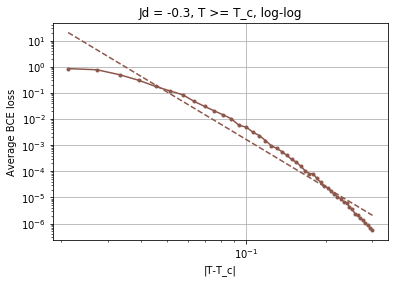

In [23]:
pf_120 = np.polyfit(np.log(np.abs(T-T_c)[idx[120]:]), np.log(errs(errs_120)[idx[120]:]), 1)

plt.plot(np.abs(T-T_c)[idx[120]:], np.exp(np.poly1d(pf_120)(np.log(np.abs(T-T_c)))[idx[120]:]), '--', label='L=120', c='C5')

plt.plot(np.abs(T-T_c)[idx[120]:], errs(errs_120)[idx[120]:], marker='.', label='L=120', c='C5')

plt.xlabel('|T-T_c|')
plt.ylabel('Average BCE loss')
plt.title(f'Jd = {Jd}, T >= T_c, log-log')

plt.xscale('log')
plt.yscale('log')

#fig.legend()
#fig.savefig('images/00-temps-above-log-log-120.png')

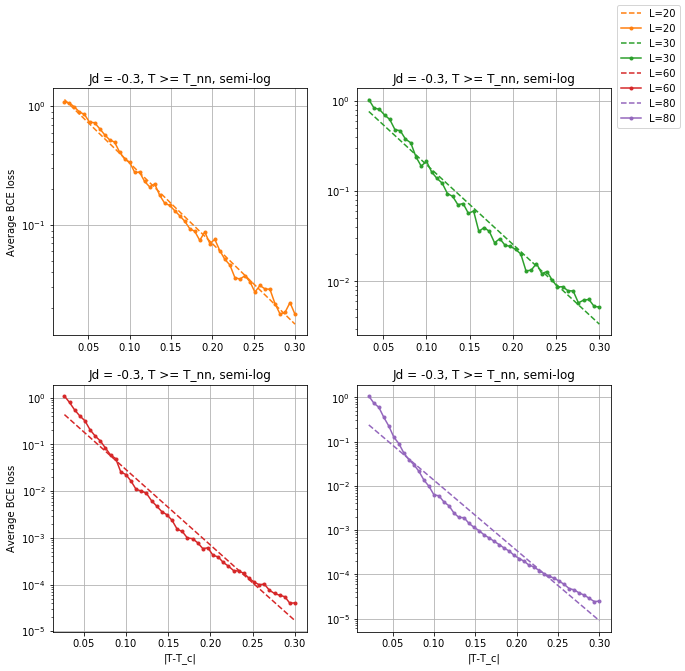

In [24]:
fig, ax = plt.subplots(2, 2, figsize=(10,10))

pf_20 = np.polyfit(np.abs(T-T_c)[idx[20]:], np.log(errs(errs_20)[idx[20]:]), 1)
pf_30 = np.polyfit(np.abs(T-T_c)[idx[30]:], np.log(errs(errs_30)[idx[30]:]), 1)
pf_60 = np.polyfit(np.abs(T-T_c)[idx[60]:], np.log(errs(errs_60)[idx[60]:]), 1)
pf_80 = np.polyfit(np.abs(T-T_c)[idx[80]:], np.log(errs(errs_80)[idx[80]:]), 1)
pf_120 = np.polyfit(np.abs(T-T_c)[idx[120]:], np.log(errs(errs_120)[idx[120]:]), 1)

ax[0, 0].plot(np.abs(T-T_c)[idx[20]:], np.exp(np.poly1d(pf_20)(np.abs(T-T_c))[idx[20]:]), '--', label='L=20', c='C1')
ax[0, 1].plot(np.abs(T-T_c)[idx[30]:], np.exp(np.poly1d(pf_30)(np.abs(T-T_c))[idx[30]:]), '--', label='L=30', c='C2')
ax[1, 0].plot(np.abs(T-T_c)[idx[60]:], np.exp(np.poly1d(pf_60)(np.abs(T-T_c))[idx[60]:]), '--', label='L=60', c='C3')
ax[1, 1].plot(np.abs(T-T_c)[idx[80]:], np.exp(np.poly1d(pf_80)(np.abs(T-T_c))[idx[80]:]), '--', label='L=80', c='C4')
#ax[2, 1].plot(np.abs(T-T_c)[idx[120]:], np.exp(np.poly1d(pf_120)(np.abs(T-T_c))[idx[120]:]), '--', label='L=120', c='C5')

ax[0, 0].plot(np.abs(T-T_c)[idx[20]:], errs(errs_20)[idx[20]:], marker='.', label='L=20', c='C1')
ax[0, 1].plot(np.abs(T-T_c)[idx[30]:], errs(errs_30)[idx[30]:], marker='.', label='L=30', c='C2')
ax[1, 0].plot(np.abs(T-T_c)[idx[60]:], errs(errs_60)[idx[60]:], marker='.', label='L=60', c='C3')
ax[1, 1].plot(np.abs(T-T_c)[idx[80]:], errs(errs_80)[idx[80]:], marker='.', label='L=80', c='C4')
#ax[2, 1].plot(np.abs(T-T_c)[idx[120]:], errs(errs_120)[idx[120]:], marker='.', label='L=120', c='C5')

plt.setp(ax[-1, :], xlabel='|T-T_c|')
plt.setp(ax[:, 0], ylabel='Average BCE loss')
plt.setp(ax, title=f'Jd = {Jd}, T >= T_nn, semi-log')

#plt.setp(ax[:, :], xscale='log')
plt.setp(ax[:, :], yscale='log')

fig.legend()
fig.savefig(f'images/{Jd}-temps-above-semi-log.png')

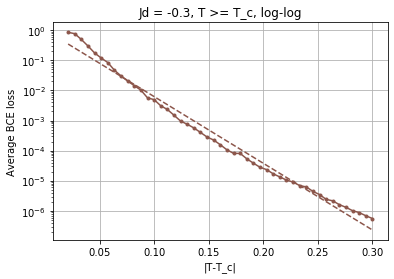

In [25]:
pf_120 = np.polyfit(np.abs(T-T_c)[idx[120]:], np.log(errs(errs_120)[idx[120]:]), 1)

plt.plot(np.abs(T-T_c)[idx[120]:], np.exp(np.poly1d(pf_120)(np.abs(T-T_c))[idx[120]:]), '--', label='L=120', c='C5')

plt.plot(np.abs(T-T_c)[idx[120]:], errs(errs_120)[idx[120]:], marker='.', label='L=120', c='C5')

plt.xlabel('|T-T_c|')
plt.ylabel('Average BCE loss')
plt.title(f'Jd = {Jd}, T >= T_c, log-log')

#plt.xscale('log')
plt.yscale('log')

#fig.legend()
#fig.savefig('images/00-temps-above-log-log-120.png')

In [ ]:
pf_20, pf_30, pf_60, pf_80, pf_120

(array([-20.94497155,  -0.635526  ]),
 array([-27.38977555,  -1.29115626]),
 array([-58.18944976,  -3.22531586]),
 array([-46.24399248,  -4.39512592]),
 array([nan, nan]))

In [50]:
1/pf_20[0], 1/pf_30[0], 1/pf_60[0], 1/pf_80[0], 1/pf_120[0]

(-0.06406401337752911,
 -0.04914927881506601,
 -0.02683868487993655,
 -0.027379473960675714,
 -0.019613830451245515)

In [51]:
np.exp(pf_20[0]), np.exp(pf_30[0]), np.exp(pf_60[0]), np.exp(pf_80[0]), np.exp(pf_120[0])

(1.6631415287062116e-07,
 1.4580316413978054e-09,
 6.581724351002178e-17,
 1.3738956965945053e-16,
 7.206802623140263e-23)